In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('transactions.csv')

**Understanding Customer Data**

In [3]:
customers.head(2)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13


In [4]:
customers.shape

(200, 4)

In [5]:
customers.isna().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [6]:
customers.describe(include='all')

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2022-04-16
freq,1,1,59,3


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


-- This dataset Up 200 customer data with ID, Region and Signup Date - it has no null values - SignupDate should be converted to datetime for further analysis

In [8]:
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])

In [9]:
customers['Region'].value_counts() #Region are well distributed

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

In [10]:
customers['SignupDate'].value_counts()

SignupDate
2022-04-16    3
2024-11-11    3
2024-09-21    2
2024-04-11    2
2024-01-30    2
             ..
2022-06-07    1
2023-03-21    1
2022-02-27    1
2022-12-03    1
2023-06-11    1
Name: count, Length: 179, dtype: int64

**Understanding Product Data**

In [11]:
products.head(2)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.3
1,P002,ActiveWear Smartwatch,Electronics,346.3


In [12]:
products.shape

(100, 4)

In [13]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [14]:
products.isna().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [15]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [16]:
products['Category'].value_counts()

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

-- we have 100 non null product dataset - Category is well distributed - Price ranges from approx 16 to 498

**Understanding Transaction Data**

In [17]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [18]:
transactions.shape

(1000, 7)

In [19]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [20]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [21]:
transactions.isna().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

-- we have non null 1000 transactions data -- total spend range is 16 to 1992 (app) -- we need to convert TransactionDate to datetime

In [22]:
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])

In [23]:
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())

Customers: 0
Products: 0
Transactions: 0


**Merging Dataset all better use**

In [24]:
merged_data = transactions.merge(customers, on="CustomerID", how="left")
merged_data = merged_data.merge(products, on="ProductID", how="left")

## EDA

**total sales by region**

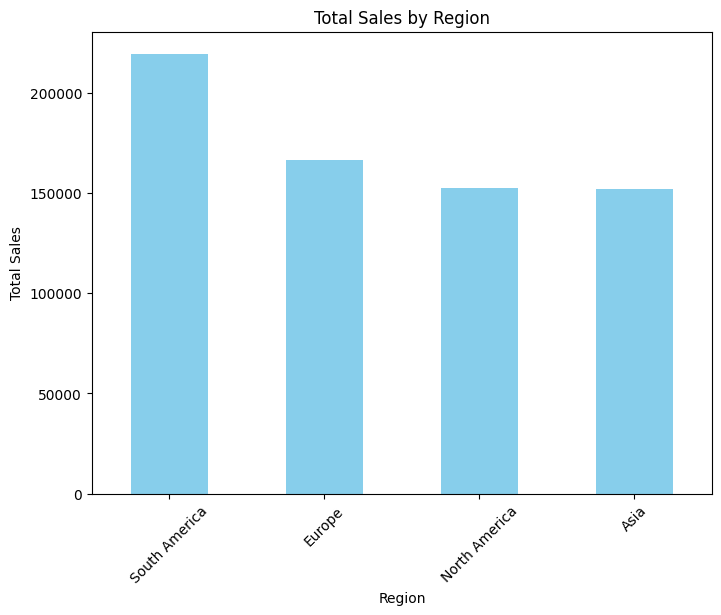

In [25]:
region_sales = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
region_sales.plot(kind="bar", color="skyblue")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

-- we can see South America leads in total sales followed by Europe

**signup trends over time**

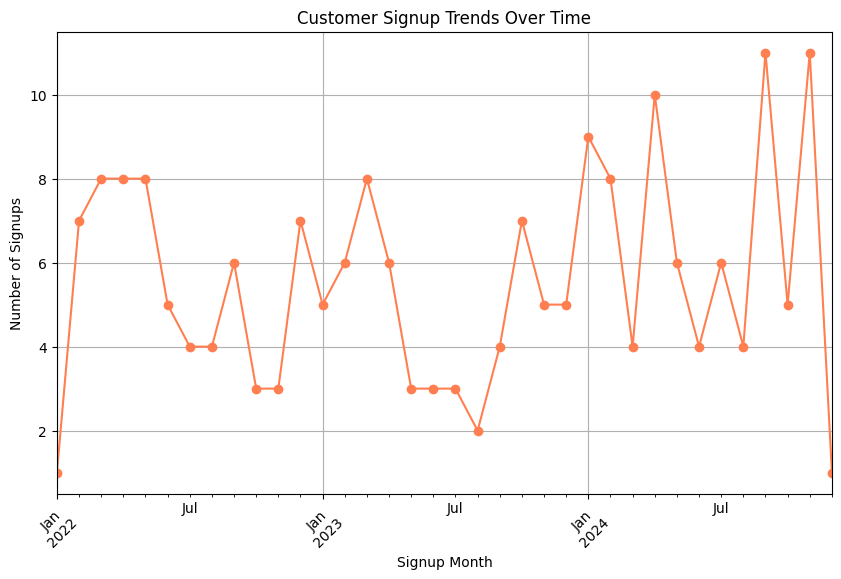

In [26]:
signup_trends = customers.groupby(customers["SignupDate"].dt.to_period("M")).size()
plt.figure(figsize=(10, 6))
signup_trends.plot(kind="line", marker="o", color="coral")
plt.title("Customer Signup Trends Over Time")
plt.xlabel("Signup Month")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.grid()
plt.show()

we see April 2024, Sep 2024, and Nov 2024 have highest peaks in no of customers that signed up

**repeat customers**

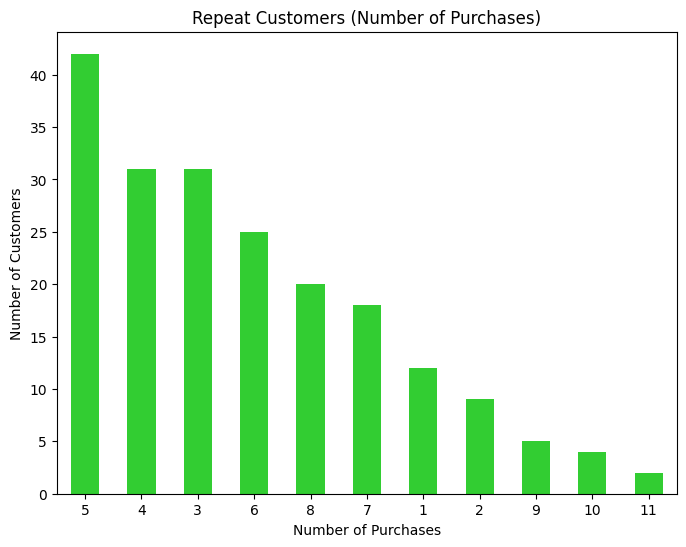

In [27]:
repeat_customers = merged_data["CustomerID"].value_counts()
repeat_customers_summary = repeat_customers.value_counts()
plt.figure(figsize=(8, 6))
repeat_customers_summary.plot(kind="bar", color="limegreen")
plt.title("Repeat Customers (Number of Purchases)")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.show()

highest no of customers have made a purchase 5 times, followed by 4 and 3

**top selling categories**

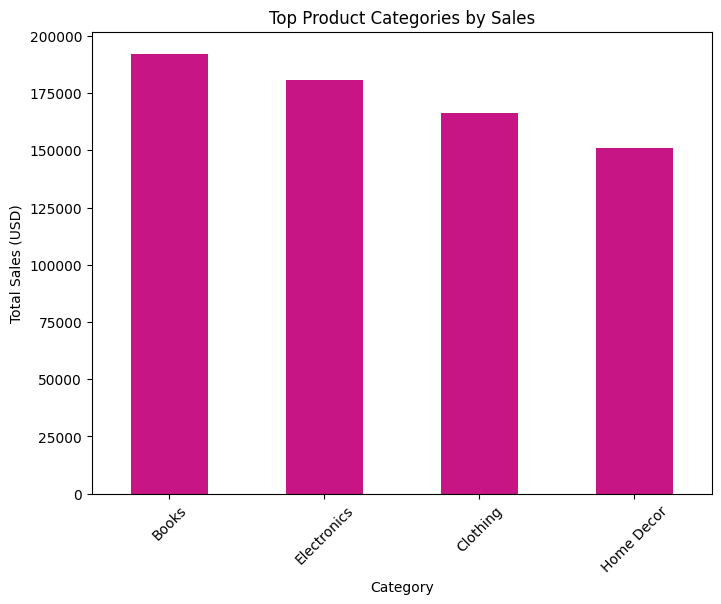

In [28]:
category_sales = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
category_sales.plot(kind="bar", color="mediumvioletred")
plt.title("Top Product Categories by Sales")
plt.xlabel("Category")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.show()

books are the highest selling category followed by electronics

**product popularity**

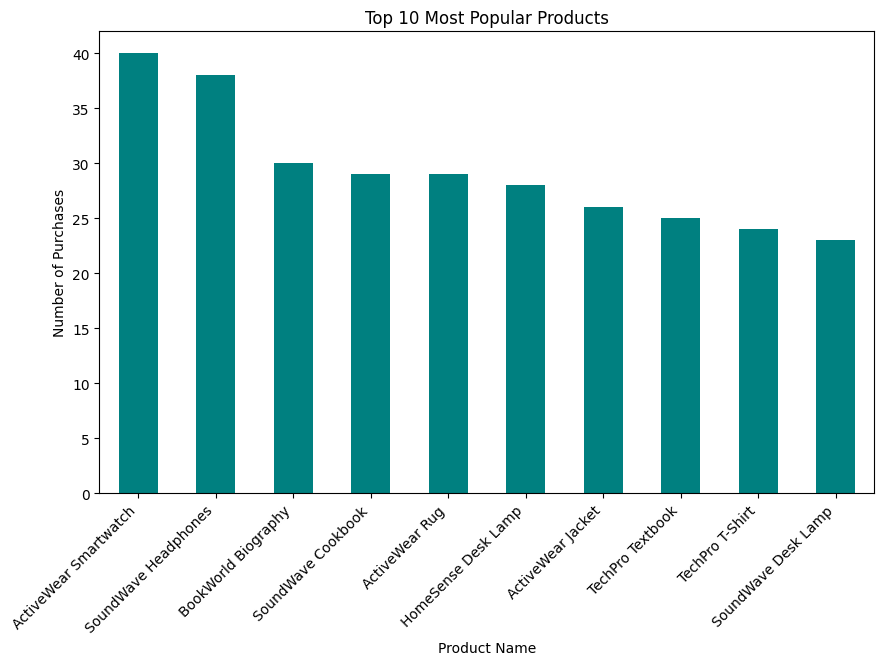

In [29]:
product_popularity = merged_data["ProductName"].value_counts().head(10)
plt.figure(figsize=(10, 6))
product_popularity.plot(kind="bar", color="teal")
plt.title("Top 10 Most Popular Products")
plt.xlabel("Product Name")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45, ha="right")
plt.show()

Activewear Smartwatch and Soundwave Headphones are highest selling products 

**Sales Trends Over Time**

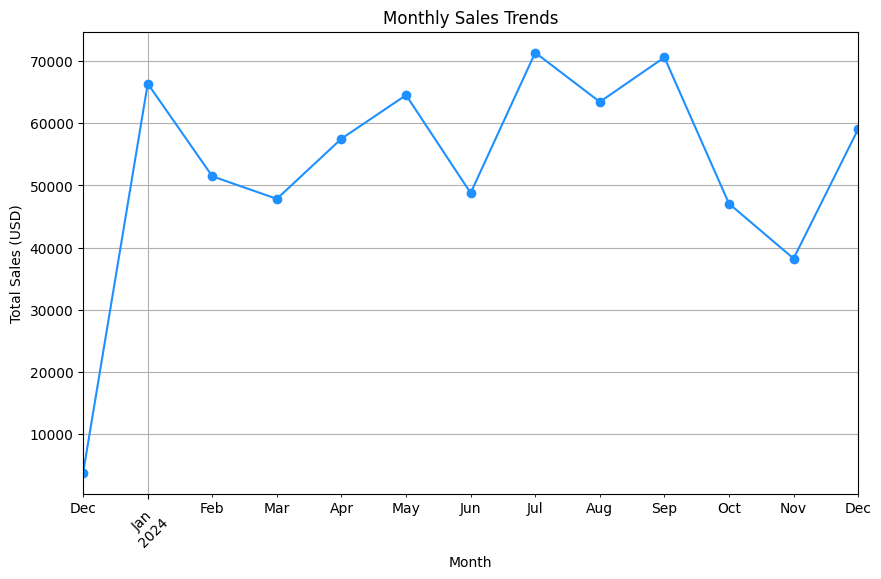

In [30]:
sales_trends = merged_data.groupby(merged_data["TransactionDate"].dt.to_period("M"))["TotalValue"].sum()
plt.figure(figsize=(10, 6))
sales_trends.plot(kind="line", marker="o", color="dodgerblue")
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

in 2024 Jan, May, July, Sep and Dec have seen sales spike

**Order Size Distribution**

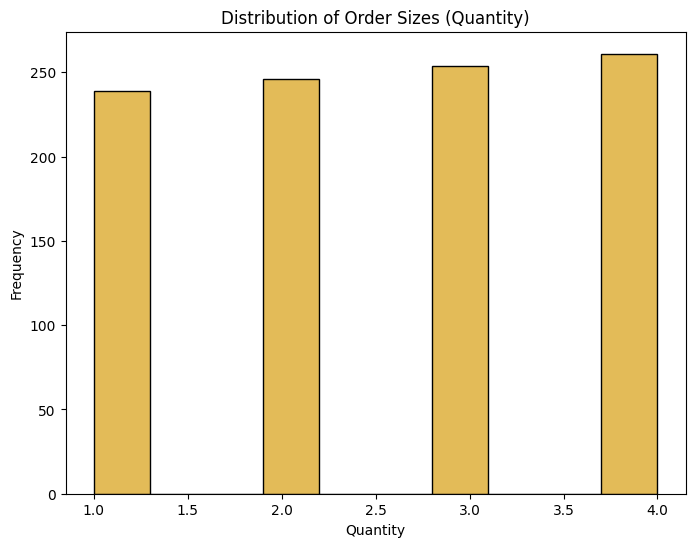

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(merged_data["Quantity"], bins=10, kde=False, color="goldenrod")
plt.title("Distribution of Order Sizes (Quantity)")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

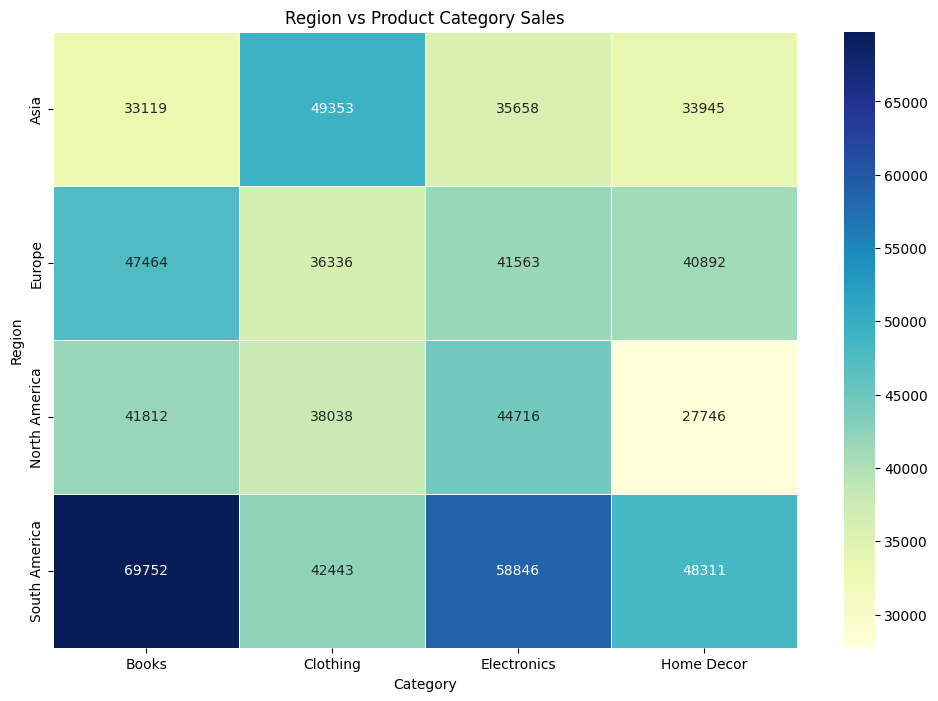

In [32]:
region_category_sales = merged_data.groupby(["Region", "Category"])["TotalValue"].sum().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(region_category_sales, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Region vs Product Category Sales")
plt.xlabel("Category")
plt.ylabel("Region")
plt.show()